In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as pl
import matplotlib.colors as colors
import matplotlib.cm as cmap

## Specify signal and bkg

In [2]:
f_bkg_0 = h5py.File('mc16_13TeV:mc16_13TeV.361023.Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ3W.deriv.DAOD_JETM6.e3668_s3126_r9364_r9315_p3600.h5')
f_bkg_1 = h5py.File('mc16_13TeV:mc16_13TeV.361024.Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ4W.deriv.DAOD_JETM6.e3668_s3126_r9364_r9315_p3600.h5')
f_bkg_2 = h5py.File('mc16_13TeV:mc16_13TeV.361026.Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ6W.deriv.DAOD_JETM6.e3569_s3126_r9364_r9315_p3600.h5')
f_bkg_3 = h5py.File('mc16_13TeV:mc16_13TeV.361027.Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ7W.deriv.DAOD_JETM6.e3668_s3126_r9364_r9315_p3600.h5')
f_bkg_4 = h5py.File('mc16_13TeV:mc16_13TeV.361028.Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ8W.deriv.DAOD_JETM6.e3569_s3126_r9364_r9315_p3600.h5')
f_bkg_5 = h5py.File('mc16_13TeV:mc16_13TeV.361029.Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ9W.deriv.DAOD_JETM6.e3569_s3126_r9364_r9315_p3600.h5')
f_bkg = [f_bkg_0, f_bkg_1, f_bkg_2, f_bkg_3, f_bkg_4, f_bkg_5]
f_sig = h5py.File('signal_Vs.h5')
#f_sig = h5py.File('signal_tops.h5')
#f_sig = h5py.File('mc16_13TeV:mc16_13TeV.361023.Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ3W.deriv.DAOD_JETM6.e3668_s3126_r9364_r9315_p3600.h5')

## Make samples

show plots for bkg/sig: 
	1. jet pT distribution; 
	2. mass distribution; 
	3. Lund Jet chain for each event (if isShowPlot is turned on)


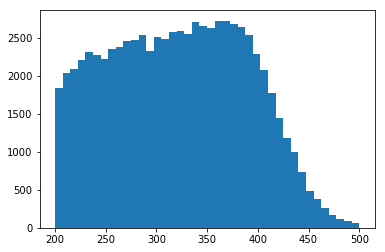

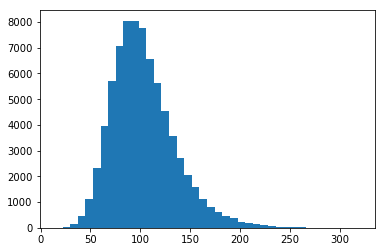

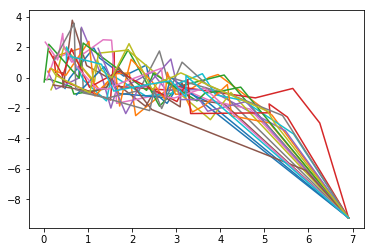

bkg:
(75551, 4, 20)
(75551, 2)


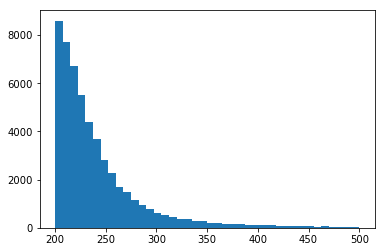

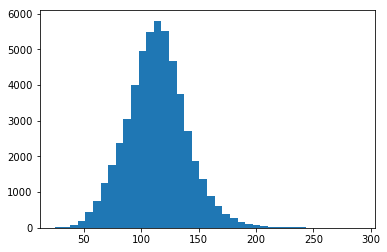

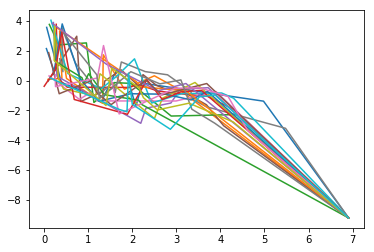

sig:
(52680, 4, 20)
(52680, 2)


In [3]:
bkgsample = [0]
nEvent_bkg = 100000
nEvent_sig = 100000
isShowPlot = 1
ptmin = 200
ptmax = 500
print "show plots for bkg/sig: \n\t1. jet pT distribution; \n\t2. mass distribution; \n\t3. Lund Jet chain for each event (if isShowPlot is turned on)"

data = f_bkg[bkgsample[0]]['lundjets_InDetTrackParticles'][0:nEvent_bkg,0,:,:].reshape(-1,1,20,6)[:,0]
# deltaR:0, z:1, pTjet:2, m:3, id:4, pT2:5
if len(bkgsample)>1:
    for i in range(1,len(bkgsample)):
        data_raw = f_bkg[bkgsample[i]]['lundjets_InDetTrackParticles'][0:nEvent_bkg,:,:,:].reshape(-1,1,20,6)[:,0]
        data = np.concatenate((data, data_raw),axis=0)
pTjet = data[:,:,2]

cut = np.zeros(pTjet.shape[0]).astype(np.bool)
for i in range(0, pTjet.shape[0]):
    cut[i] = pTjet[i,0]>ptmin and pTjet[i,0]<ptmax
deltaR = data[:,:,0][cut] # jet cut: all-0 and pT limit
pT2 = data[:,:,5][cut]
z = data[:,:,1][cut]
mass = data[:,:,3][cut]
deltaR[deltaR==1.] = 1e-3 # padding-0
pT2[pT2==1.] = 1e-1
pl.hist(pTjet[cut][:,0], bins=40)
pl.show()
pl.hist(mass[:,0], bins=40)
pl.show()
X_bkg = np.array([np.log(1/deltaR), np.log(deltaR * pT2), np.log(1/z), mass])
X_bkg = X_bkg.swapaxes(1,0) # exchange dimention
Y_bkg = np.array([[0,1] for i in range(X_bkg.shape[0])])
if isShowPlot:
    pl.plot(np.transpose(X_bkg[0:20,0,:]), np.transpose(X_bkg[0:20,1,:])) # plot each curve
    pl.show()
print "bkg:"
print X_bkg.shape
print Y_bkg.shape


data = f_sig['lundjets_InDetTrackParticles'][0:nEvent_sig,:,:,:].reshape(-1,1,20,6)[:,0]
# deltaR:0, z:1, pTjet:2, m:3, id:4, pT2:5
pTjet = data[:,:,2]

cut = np.zeros(pTjet.shape[0]).astype(np.bool)
for i in range(0, pTjet.shape[0]):
    cut[i] = pTjet[i,0]>ptmin and pTjet[i,0]<ptmax
deltaR = data[:,:,0][cut] # jet cut: all-0 and pT limit
pT2 = data[:,:,5][cut]
z = data[:,:,1][cut]
mass = data[:,:,3][cut]
deltaR[deltaR==1.] = 1e-3 # padding-0
pT2[pT2==1.] = 1e-1
pl.hist(pTjet[cut][:,0], bins=40)
pl.show()
pl.hist(mass[:,0], bins=40)
pl.show()
X_sig = np.array([np.log(1/deltaR), np.log(deltaR * pT2), np.log(1/z), mass])
X_sig = X_sig.swapaxes(1,0) # exchange dimention
Y_sig = np.array([[1,0] for i in range(X_sig.shape[0])])
if isShowPlot:
    pl.plot(np.transpose(X_sig[0:20,0,:]), np.transpose(X_sig[0:20,1,:])) # plot each curve
    pl.show()
print "sig:"
print X_sig.shape
print Y_sig.shape

## Plot Lund Image if wanted

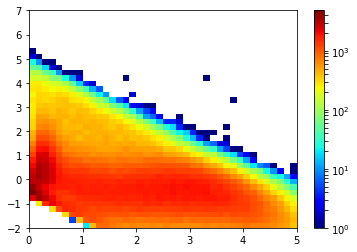

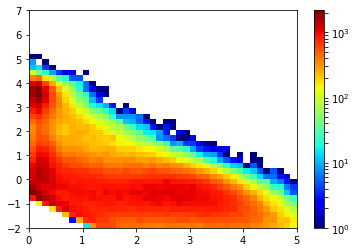

In [4]:
pl.hist2d(X_bkg[:,0,:].flatten(), X_bkg[:,1,:].flatten(), bins=40, range=[[0,5],[-2,7]], norm=colors.LogNorm(), cmap=cmap.jet)
pl.colorbar()
pl.show()

pl.hist2d(X_sig[:,0,:].flatten(), X_sig[:,1,:].flatten(), bins=40, range=[[0,5],[-2,7]], norm=colors.LogNorm(), cmap=cmap.jet)
pl.colorbar()
pl.show()

## Specify train & test data

In [5]:
from sklearn.model_selection import train_test_split
# concatenate bkg and signal, mix them together and make train/test samples
nbkginput = 25000 # num of input for bkg/sig
nsiginput = 25000 # num of input for bkg/sig
X_train,X_test,Y_train,Y_test = train_test_split(np.concatenate((X_bkg[0:nbkginput], X_sig[0:nsiginput]), axis=0), np.concatenate((Y_bkg[0:nbkginput], Y_sig[0:nsiginput]), axis=0), test_size=0.2, random_state = 4)
print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(40000, 4, 20)
(10000, 4, 20)
(40000, 2)
(10000, 2)


* As a test, here we use three observables ($ \ln (1/\Delta R) $, $ \ln (p_T\cdot\Delta R) $, $ \ln (1/z) $) to train RNN

In [6]:
X_train = X_train[:,0:3,:]
X_test = X_test[:,0:3,:]

## Make RNN

In [7]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import SimpleRNN, Activation, Dense
from keras.optimizers import Adam
import numpy as np

TIME_STEPS = 20    # same as the height of the image
INPUT_SIZE = 3     # same as the width of the image
BATCH_SIZE = 50
BATCH_INDEX = 0
OUTPUT_SIZE = 2
CELL_SIZE = 50
LR = 0.001

model = Sequential()
# RNN cell
model.add(SimpleRNN(
    # for batch_input_shape, if using tensorflow as the backend, we have to put None for the batch_size.
    # Otherwise, model.evaluate() will get error.
    batch_input_shape=(None, TIME_STEPS, INPUT_SIZE),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
    output_dim=CELL_SIZE,
    unroll=True,
))

model.add(Dense(OUTPUT_SIZE))
model.add(Activation('softmax'))

model.summary()

adam = Adam(LR)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Using TensorFlow backend.
/afs/cern.ch/work/m/mkagan/public/miniconda3/envs/testenv/lib/python2.7/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(units=50, unroll=True, batch_input_shape=(None, 20,...)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                2700      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 102       
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 2,802.0
Trainable params: 2,802.0
Non-trainable params: 0.0
_________________________________________________________________


In [8]:
# training
for step in range(4001):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch = X_train[BATCH_INDEX: BATCH_INDEX+BATCH_SIZE, :, :].swapaxes(2,1)
    Y_batch = Y_train[BATCH_INDEX: BATCH_INDEX+BATCH_SIZE, :]
    cost = model.train_on_batch(X_batch, Y_batch)
    BATCH_INDEX += BATCH_SIZE
    BATCH_INDEX = 0 if BATCH_INDEX >= X_train.shape[0] else BATCH_INDEX

    if step % 500 == 0:
        cost, accuracy = model.evaluate(X_test.swapaxes(2,1), Y_test, batch_size=Y_test.shape[0], verbose=True)
        print('test cost: ', cost, 'test accuracy: ', accuracy)

10000/10000 [==============================] - 0s
('test cost: ', 0.95355117321014404, 'test accuracy: ', 0.49599999189376831)
10000/10000 [==============================] - 0s
('test cost: ', 0.70062369108200073, 'test accuracy: ', 0.49599999189376831)
10000/10000 [==============================] - 0s
('test cost: ', 0.55371379852294922, 'test accuracy: ', 0.7192000150680542)
10000/10000 [==============================] - 0s
('test cost: ', 0.47015753388404846, 'test accuracy: ', 0.78270000219345093)
10000/10000 [==============================] - 0s
('test cost: ', 0.45509657263755798, 'test accuracy: ', 0.78710001707077026)
10000/10000 [==============================] - 0s
('test cost: ', 0.45164433121681213, 'test accuracy: ', 0.79070001840591431)
10000/10000 [==============================] - 0s
('test cost: ', 0.43929243087768555, 'test accuracy: ', 0.79689997434616089)
10000/10000 [==============================] - 0s
('test cost: ', 0.44180718064308167, 'test accuracy: ', 0.7968

## ROC curve

10000/10000 [==============================] - 0s


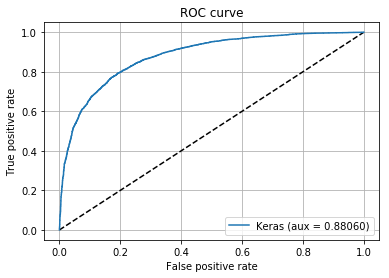

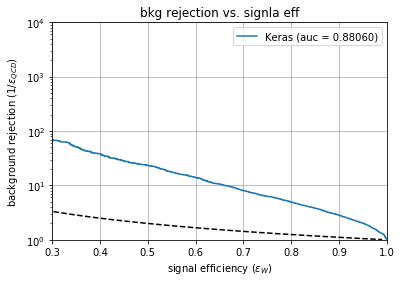

In [9]:
from sklearn.metrics import roc_curve, auc
Y_pred = model.predict(X_test.swapaxes(2,1), batch_size=Y_test.shape[0], verbose=True)
fpr, tpr, thresholds = roc_curve(Y_test[:,0], Y_pred[:,0])
auc = auc(fpr, tpr) # cacluate area under curve

pl.figure(1)
pl.plot([0, 1], [0, 1], 'k--')
pl.plot(fpr, tpr, label='Keras (aux = {:.5f})'.format(auc))
pl.xlabel('False positive rate')
pl.ylabel('True positive rate')
pl.title('ROC curve')
pl.legend(loc='best')
pl.grid()
pl.show()

pl.figure(2)
tpr0 = np.arange(0.01, 1, 0.01)
pl.semilogy(tpr0, 1/tpr0, 'k--')
fpr[fpr<1e-4]=1e-4
pl.semilogy(tpr, 1/fpr, label='Keras (auc = {:.5f})'.format(auc))
pl.xlabel(r'signal efficiency ($\epsilon_{W}$)')
pl.ylabel(r'background rejection ($1/\epsilon_{QCD}$)')
pl.title('bkg rejection vs. signla eff')
pl.legend(loc='best')
pl.xlim(0.3, 1.)
pl.ylim(1, 1e4)
pl.grid()
pl.show()